In [361]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
#from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
import copy



In [362]:
data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['revenue'], inplace=True)

test_data = pd.read_csv('test.csv')
test_data.dropna(axis=0, subset=['revenue'], inplace=True)

In [363]:
test_data = test_data[test_data['revenue'] > 0]

In [424]:
train_y = data.revenue
train_X = data.drop(['revenue'], axis=1)

test_y = test_data.revenue
test_X = test_data.drop(['revenue'], axis=1)

In [365]:
train_X.head()

,budget,popularity,runtime,title,vote_average,vote_count,year,day_1,day_2,day_3,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,30000000.0,21.946943,81.0,Toy Story,7.7,5415.0,1995.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65000000.0,17.015539,104.0,Jumanji,6.9,2413.0,1995.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16000000.0,3.859495,127.0,Waiting to Exhale,6.1,34.0,1995.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,60000000.0,17.924927,170.0,Heat,7.7,1886.0,1995.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35000000.0,5.231580,106.0,Sudden Death,5.5,174.0,1995.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [366]:
train_y.head()

0    373554033.0
1    262797249.0
2     81452156.0
3    187436818.0
4     64350171.0
Name: revenue, dtype: float64

/Users/joshpapermaster/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joshpapermaster/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


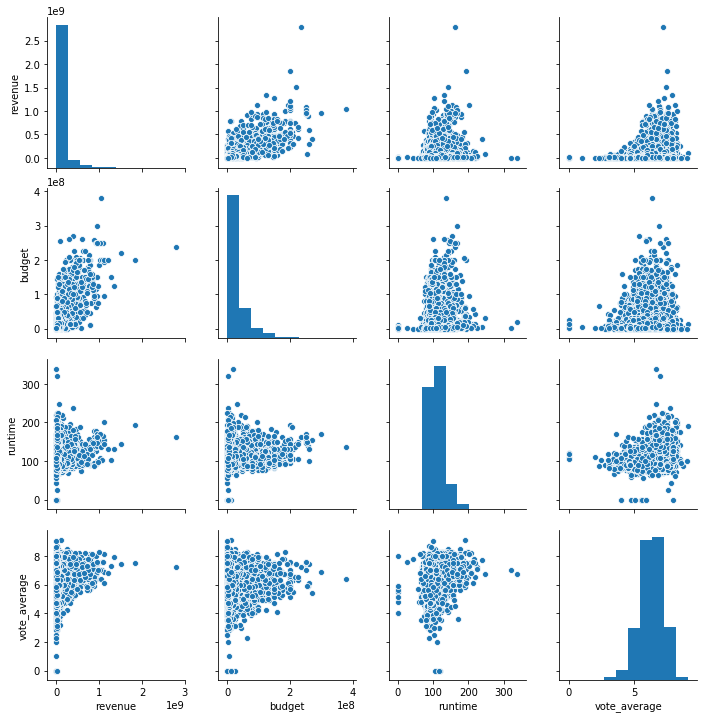

In [367]:
sns.pairplot(data, vars = ['revenue', 'budget', 'runtime', 'vote_average'])

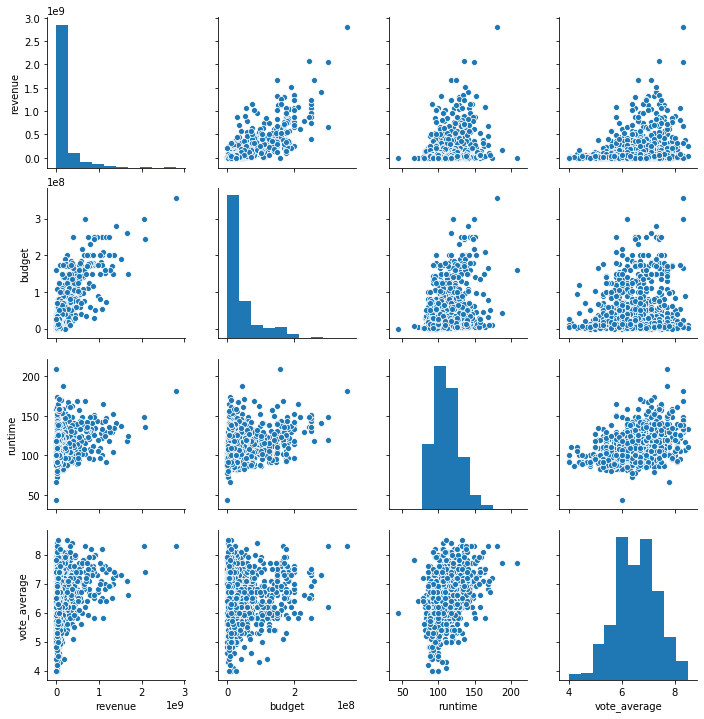

In [368]:
sns.pairplot(test_data, vars = ['revenue', 'budget', 'runtime', 'vote_average'])

In [539]:
def formatX(x):
    x = x[["budget", "vote_average", "vote_count", "runtime"]]
    x = x.fillna(x.mean())
    return x

In [540]:
def lin_model(x, y):
    x = formatX(x)
    model = linear_model.LinearRegression()
    model.fit(x, y)
    return model

In [541]:
model = lin_model(train_X,train_y)

In [542]:
model.score(formatX(test_X), test_y)

0.4973371463475572

In [502]:
test_results = model.predict(formatX(test_X))

In [556]:
from sklearn.metrics import mean_absolute_error


In [557]:
np.sqrt(mean_squared_error(test_results, test_y))

193817163.8283465

Sort by genre to use different predictor for each

In [343]:
# import sys
# !{sys.executable} -m pip install textblob

In [389]:
from textblob import TextBlob 
def add_title_polarity(x):
    try:
        if x['title_polarity'] != []:
            print("Already defined")
    except:
        text_data = []
        for title in x['title']:
            text_data.append(TextBlob(title).sentiment.polarity)
        x['title_polarity'] = text_data
    

In [390]:
add_title_polarity(train_X)

In [545]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 77 columns):
budget                4617 non-null float64
popularity            4617 non-null float64
runtime               4616 non-null float64
title                 4617 non-null object
vote_average          4617 non-null float64
vote_count            4617 non-null float64
year                  4617 non-null float64
day_1                 4617 non-null int64
day_2                 4617 non-null int64
day_3                 4617 non-null int64
day_4                 4617 non-null int64
day_5                 4617 non-null int64
day_6                 4617 non-null int64
day_7                 4617 non-null int64
day_8                 4617 non-null int64
day_9                 4617 non-null int64
day_10                4617 non-null int64
day_11                4617 non-null int64
day_12                4617 non-null int64
day_13                4617 non-null int64
day_14                4617 non-null int6

In [551]:
temp_df = train_X.loc[train_X['title_polarity'] == 1]
temp_df = temp_df.loc[train_X['Comedy'] == 1]
temp_df['title'].head()

0                          Toy Story
2                  Waiting to Exhale
6             The American President
11                        Four Rooms
12    Ace Ventura: When Nature Calls
Name: title, dtype: object

Seems to generally work well besides occassional outliers "a perfect murder"

In [550]:
temp_df = train_X.loc[train_X['title_polarity'] == -1]
temp_df = temp_df.loc[train_X['Comedy'] == 1]
temp_df['title'].head()

3325    Dr. Horrible's Sing-Along Blog
3714           Tucker and Dale vs Evil
3822                   Horrible Bosses
4111     Hoodwinked Too! Hood VS. Evil
4484    The Worst Christmas of My Life
Name: title, dtype: object

In [444]:
add_title_polarity(test_X)

In [394]:
genres = ["Action",                
"Adventure",             
"Animation",             
"Comedy",     
"Crime",      
"Documentary",
"Drama",  
"Family", 
"Fantasy",
"History",
"Horror", 
"Music",  
"Mystery",
"Romance",
"Science Fiction",
"TV Movie",
"Thriller",
"War",
"Western"]

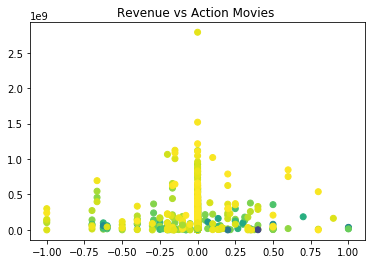

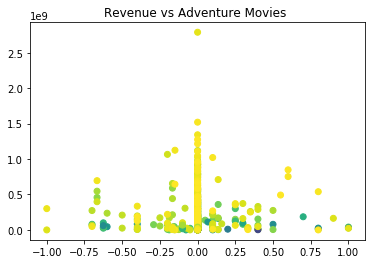

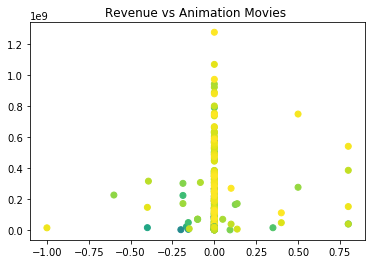

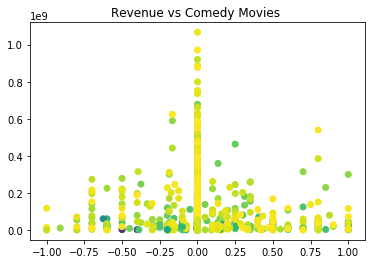

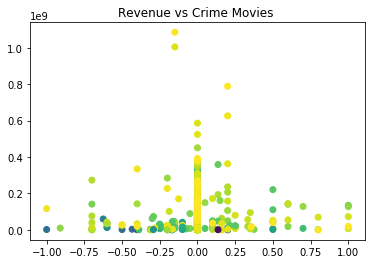

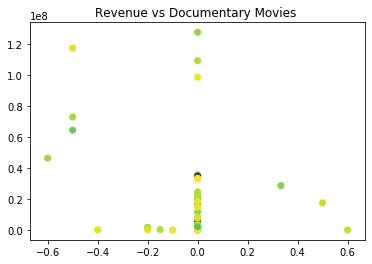

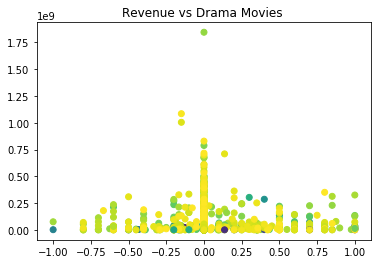

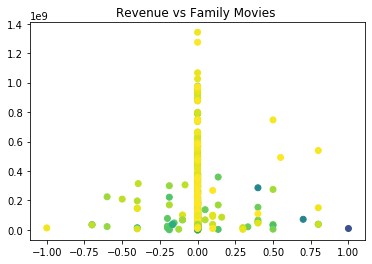

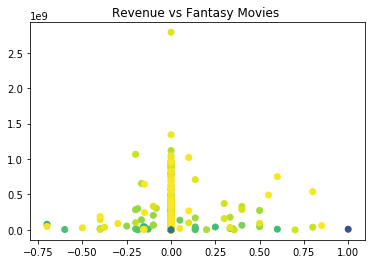

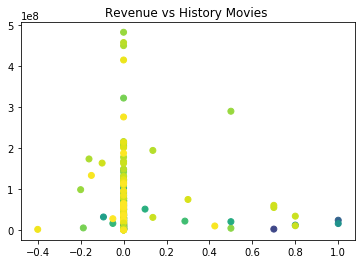

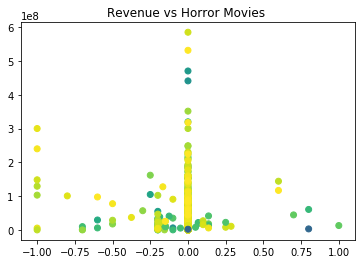

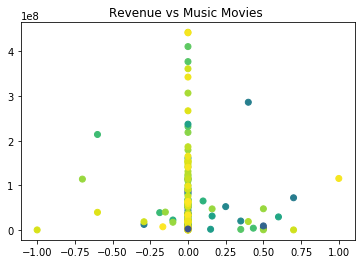

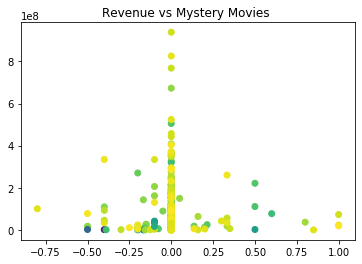

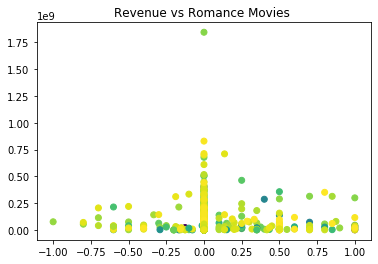

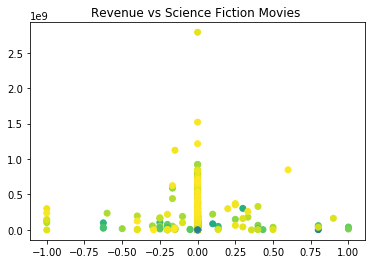

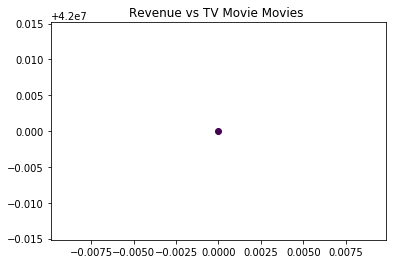

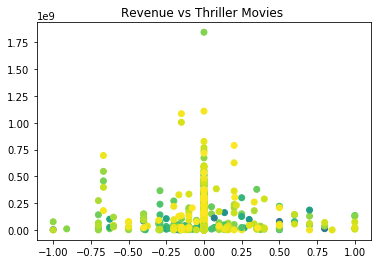

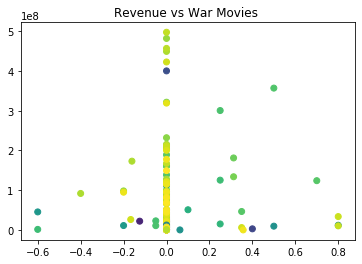

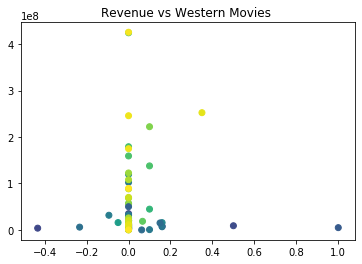

In [531]:
add_title_polarity(data)
for genre in genres:
    exampleSet = data.loc[data[genre] == 1]
    plt.title("Revenue vs " + genre + " Movies ")
    plt.scatter(exampleSet['title_polarity'], exampleSet['revenue'], c=exampleSet['year'])
    plt.show()

Interesting to see which movie genres tended to produce more sentiment scores that were not zero. Drama, action, comedy, thriller, and romance appear to have the most drastic polarity scores across the board

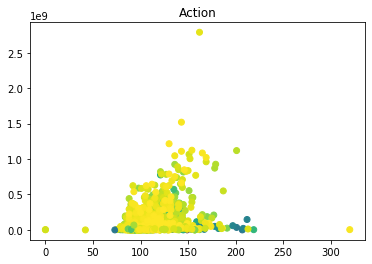

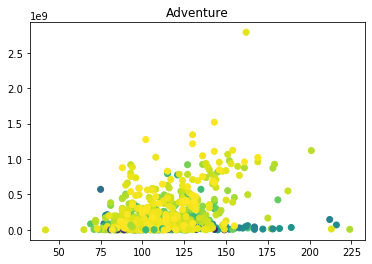

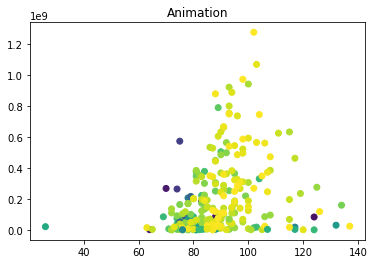

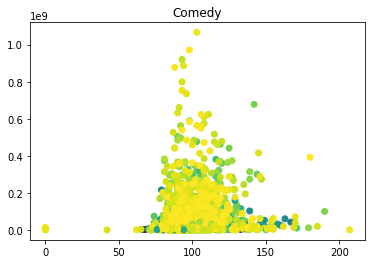

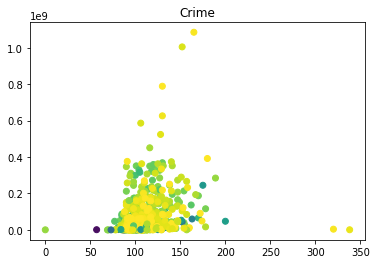

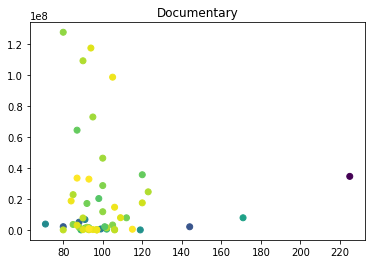

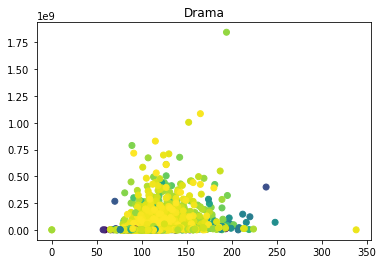

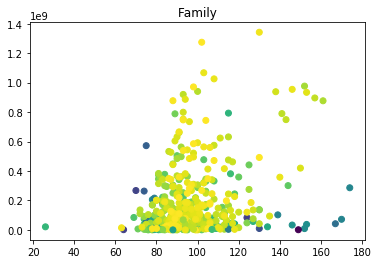

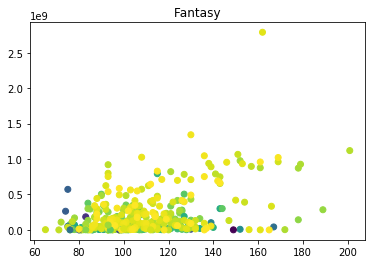

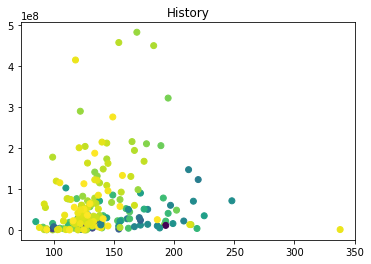

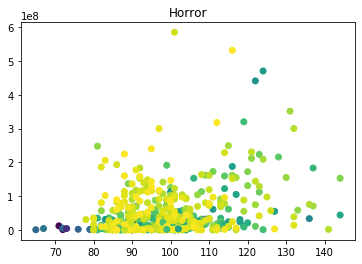

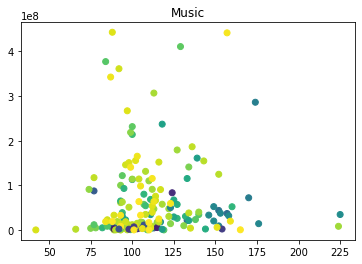

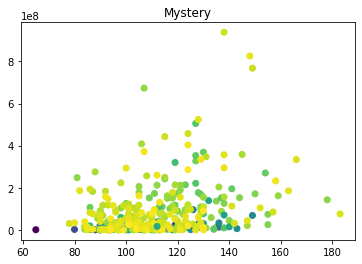

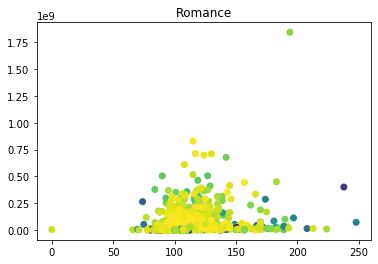

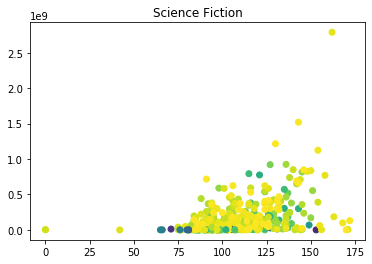

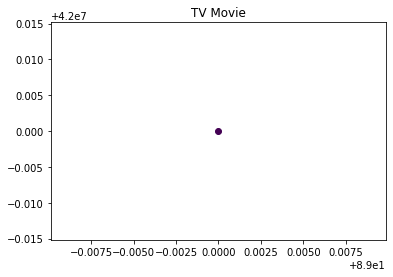

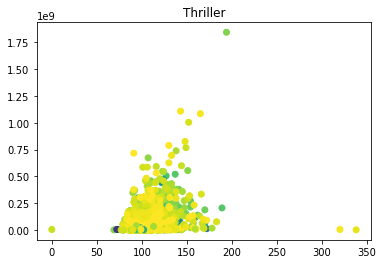

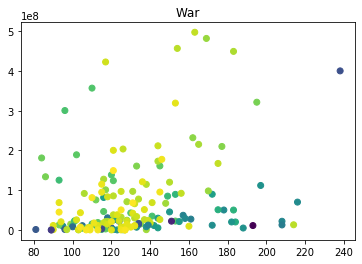

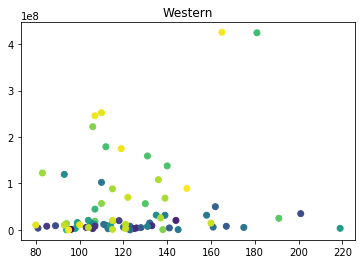

In [396]:
for genre in genres:
    exampleSet = data.loc[data[genre] == 1]
    plt.title(genre)
    plt.scatter(exampleSet['runtime'], exampleSet['revenue'], c=exampleSet['year'])
    plt.show()

General take away is that movies that were long IN RELATION to other movies in that genre tended to not generate as much money. One exception was sci-fi which appeared to do slightly better on the further end of the scale 

In [397]:
def generate_average_dict(x):
    runtime_genre_avg = {}
    for genre in genres:
        exampleSet = x.loc[x[genre] == 1]
        print(genre)
        print(exampleSet['runtime'].mean())
        runtime_genre_avg[genre] = exampleSet['runtime'].mean()
    return runtime_genre_avg

In [398]:
def add_averages(x):
    average_runtime = []
    i=0
    runtime_genre_avg = generate_average_dict(x)
    for samp in x.iterrows():
        flag = False
        for genre in genres:
            if x[genre][i] == 1 and not flag:
                average_runtime.append(runtime_genre_avg[genre])
                flag = True
        if not flag:
            average_runtime.append(x['runtime'].mean())
        i+=1
    x['runtime_avg'] = average_runtime

In [399]:
add_averages(train_X)

Action
112.14119601328903
Adventure
112.49815498154982
Animation
89.76446280991736
Comedy
101.80186335403727
Crime
110.72503242542153
Documentary
100.78181818181818
Drama
115.85113122171946
Family
97.80694143167028
Fantasy
107.21846846846847
History
141.49484536082474
Horror
98.64187866927593
Music
112.07058823529412
Mystery
110.95696202531646
Romance
113.17809734513274
Science Fiction
106.35636363636364
TV Movie
89.0
Thriller
109.35560675883256
War
131.61676646706587
Western
123.0506329113924


In [400]:
add_averages(test_X)

Action
116.0814332247557
Adventure
113.49771689497717
Animation
93.41025641025641
Comedy
104.71428571428571
Crime
114.74615384615385
Documentary
103.33333333333333
Drama
115.73673036093419
Family
99.39285714285714
Fantasy
111.712
History
123.81666666666666
Horror
101.04895104895105
Music
111.23333333333333
Mystery
110.09375
Romance
110.61016949152543
Science Fiction
116.74820143884892
TV Movie
67.0
Thriller
110.58680555555556
War
120.06976744186046
Western
122.18181818181819


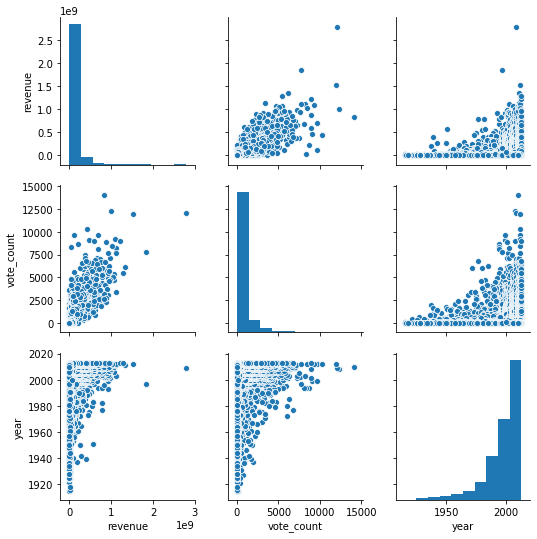

In [401]:
sns.pairplot(data, vars = ['revenue', 'vote_count', 'year'])

Adaboost

In [402]:
from sklearn.ensemble import AdaBoostRegressor

In [403]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 78 columns):
budget                4617 non-null float64
popularity            4617 non-null float64
runtime               4616 non-null float64
title                 4617 non-null object
vote_average          4617 non-null float64
vote_count            4617 non-null float64
year                  4617 non-null float64
day_1                 4617 non-null int64
day_2                 4617 non-null int64
day_3                 4617 non-null int64
day_4                 4617 non-null int64
day_5                 4617 non-null int64
day_6                 4617 non-null int64
day_7                 4617 non-null int64
day_8                 4617 non-null int64
day_9                 4617 non-null int64
day_10                4617 non-null int64
day_11                4617 non-null int64
day_12                4617 non-null int64
day_13                4617 non-null int64
day_14                4617 non-null int6

In [404]:
def format_x_ada(x):
    x = x[["budget", "popularity", "runtime", "vote_average", "vote_count", "year", "title_polarity"]+genres]
    x = x.fillna(x.mean())
    return x

In [405]:
def getModelScore(model, format_x):
    model.fit(format_x(train_X), train_y)
    results = model.predict(format_x(test_X))
    print(mean_absolute_error(results, test_y))

In [406]:
reg = AdaBoostRegressor(n_estimators=100)
getModelScore(reg, format_x_ada)

198532621.7213924


In [410]:
reg.score(format_x_ada(train_X), train_y)

-0.09892652858501805

In [434]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(format_x_ada(train_X), train_y)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [442]:
params = grid_search.best_params_
rf = RandomForestRegressor(n_estimators=params['n_estimators'], bootstrap = params['bootstrap'], max_depth = params['max_depth'], min_samples_leaf = params['min_samples_leaf'], min_samples_split = params['min_samples_split']) 
rf.fit(format_x_ada(train_X), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [445]:
results = rf.predict(format_x_ada(test_X))
print(mean_absolute_error(results, test_y))

95798933.93268517


In [447]:
reg = AdaBoostRegressor(RandomForestRegressor())
getModelScore(reg, format_x_ada)

95876224.91687742


In [469]:
param_grid = {'n_estimators': [50, 100],
             'learning_rate' : [0.01,0.05,0.1,0.3,1],
             'loss' : ['linear', 'square', 'exponential']
             }

ABR = AdaBoostRegressor()

# run grid search
grid_search_ABR = GridSearchCV(ABR, param_grid=param_grid, verbose=2, n_jobs=-1)

In [470]:
grid_search_ABR.fit(format_x_ada(train_X), train_y)
grid_search_ABR.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.9s finished


{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}

In [471]:
params = grid_search_ABR.best_params_
ABR = AdaBoostRegressor(learning_rate=params['learning_rate'], loss=params['loss'], n_estimators=params['n_estimators'])
getModelScore(ABR, format_x_ada)


111782961.03795457


In [512]:
param_grid = {'n_estimators': [800,900,1000,1200],
             'learning_rate' : [0.0009, 0.001, 0.002, 0.003],
             'loss' : ['linear', 'square', 'exponential']
             }

ABR = AdaBoostRegressor()

# run grid search
grid_search_ABR = GridSearchCV(ABR, param_grid=param_grid, verbose=2, n_jobs=-1)

In [513]:
grid_search_ABR.fit(format_x_ada(train_X), train_y)
grid_search_ABR.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.0min finished


{'learning_rate': 0.003, 'loss': 'linear', 'n_estimators': 1200}

In [527]:
params = grid_search_ABR.best_params_
ABR = AdaBoostRegressor(learning_rate=0.0001, n_estimators=1200)

In [528]:
getModelScore(ABR, format_x_ada)

102160903.39005546


In [516]:
ABR.feature_importances_ 

array([1.82543504e-01, 7.08633360e-02, 2.76071693e-03, 4.38803888e-04,
       7.33559028e-01, 2.02072117e-04, 0.00000000e+00, 0.00000000e+00,
       7.24948914e-03, 1.73995065e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.62794565e-03, 3.02549146e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.78559935e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

<BarContainer object of 26 artists>

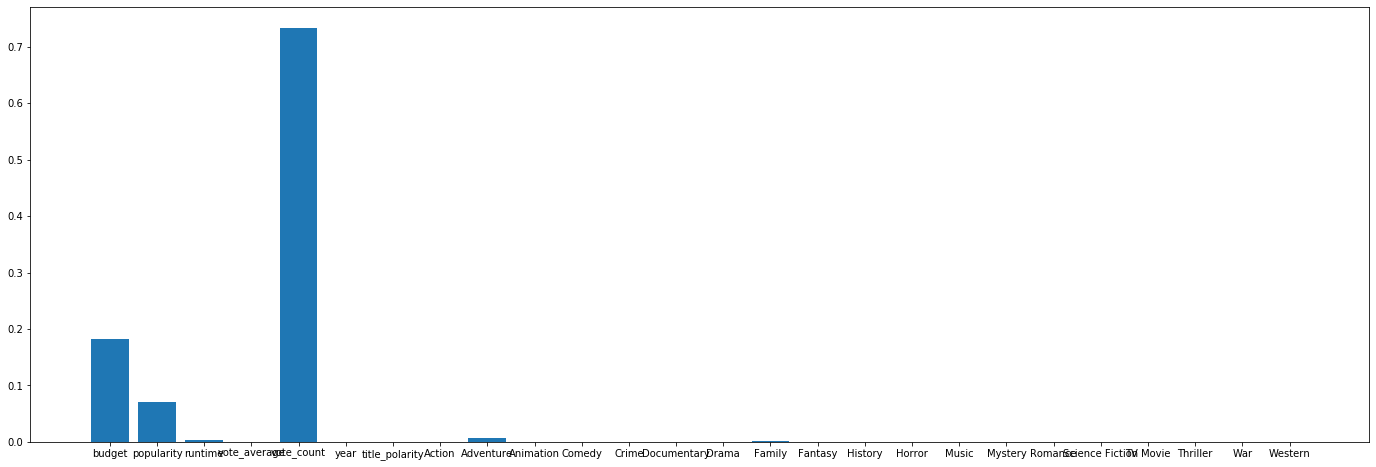

In [517]:
features = ["budget", "popularity", "runtime", "vote_average", "vote_count", "year", "title_polarity"]+genres
plt.figure(figsize=(24,8))
plt.bar(features, ABR.feature_importances_)

In [533]:
ABR.score(format_x_ada(test_X), test_y)

0.6066457540955723

In [558]:
data.revenue

0       373554033.0
1       262797249.0
2        81452156.0
3       187436818.0
4        64350171.0
5       352194034.0
6       107879496.0
7        13681765.0
8        10017322.0
9       116112375.0
10      135000000.0
11        4300000.0
12      212385533.0
13       35431113.0
14      115101622.0
15       30303072.0
16       49800000.0
17       27400000.0
18        1738611.0
19      168840000.0
20      254134910.0
21       39363635.0
22      122195920.0
23       21284514.0
24       23574130.0
25      327311859.0
26      346079773.0
27       23341568.0
28        6700000.0
29       28215918.0
           ...     
4587       809000.0
4588     55635037.0
4589     17000000.0
4590            3.0
4591        11455.0
4592     11171900.0
4593      4803665.0
4594      2294357.0
4595     17850711.0
4596      1877122.0
4597      3704408.0
4598     17566040.0
4599      2141028.0
4600      4588176.0
4601      3919731.0
4602      9713500.0
4603      1477030.0
4604      9938268.0
4605      2000000.0
